In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('http://bit.ly/SalariesDataset')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
# Try to predict salary of a person acoording to how many years he/she has worked / working experience

df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

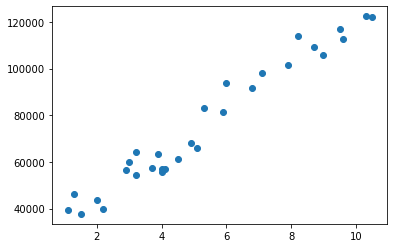

In [7]:
plt.scatter(x=df['YearsExperience'], y=df['Salary'])
plt.show

In [12]:
# Divide the data into dependent and independent variables

X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values


In [13]:
# split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
# Build regression model
from sklearn.linear_model import LinearRegression

salary_regression = LinearRegression()

salary_regression.fit(X_train, y_train)

LinearRegression()

In [15]:
# See model's coefficient and intercept value
print(salary_regression.intercept_)
print(salary_regression.coef_)

26780.099150628186
[9312.57512673]


In [16]:
# See our model's performance

y_predictions = salary_regression.predict(X_test)

salary_predictions = pd.DataFrame({'OG Values' : y_test, 'Predicted Values' : y_predictions})
salary_predictions

,OG Values,Predicted Values
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


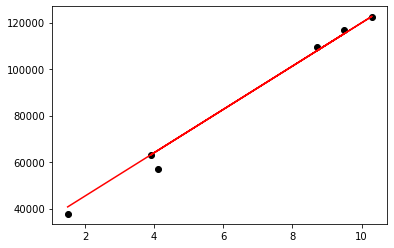

In [22]:
# Line of best fit
plt.scatter(X_test, y_test, color='black')
plt.plot( X_test, y_predictions, color='red' )

In [28]:
# RMSE Score and absolute error
from sklearn import metrics

print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_predictions))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_predictions)))

Mean Absolute Error :  2446.1723690465064
RMSE :  3580.979237321345
